# Section 1: Exercise

## Q1. Create a straight line dataset using the linear regression formula (weight * X + bias).

- Set `weight = 0.3` and `bias = 0.9`. There should be at least 100 datapoints in total.
- Split the data into 80% training and 20% testing.
- Plot the training and testing data for visualization.


In [16]:
## Imports

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### Torch version
torch.__version__

'2.6.0+cpu'

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
## Data
weight = 0.3
bias = 0.9
n_points = 100

X = torch.linspace(0, 5, 100).unsqueeze(dim = 1) 
X, X.shape

(tensor([[0.0000],
         [0.0505],
         [0.1010],
         [0.1515],
         [0.2020],
         [0.2525],
         [0.3030],
         [0.3535],
         [0.4040],
         [0.4545],
         [0.5051],
         [0.5556],
         [0.6061],
         [0.6566],
         [0.7071],
         [0.7576],
         [0.8081],
         [0.8586],
         [0.9091],
         [0.9596],
         [1.0101],
         [1.0606],
         [1.1111],
         [1.1616],
         [1.2121],
         [1.2626],
         [1.3131],
         [1.3636],
         [1.4141],
         [1.4646],
         [1.5152],
         [1.5657],
         [1.6162],
         [1.6667],
         [1.7172],
         [1.7677],
         [1.8182],
         [1.8687],
         [1.9192],
         [1.9697],
         [2.0202],
         [2.0707],
         [2.1212],
         [2.1717],
         [2.2222],
         [2.2727],
         [2.3232],
         [2.3737],
         [2.4242],
         [2.4747],
         [2.5253],
         [2.5758],
         [2.

In [19]:
y = weight * X + bias
y, y.shape

(tensor([[0.9000],
         [0.9152],
         [0.9303],
         [0.9455],
         [0.9606],
         [0.9758],
         [0.9909],
         [1.0061],
         [1.0212],
         [1.0364],
         [1.0515],
         [1.0667],
         [1.0818],
         [1.0970],
         [1.1121],
         [1.1273],
         [1.1424],
         [1.1576],
         [1.1727],
         [1.1879],
         [1.2030],
         [1.2182],
         [1.2333],
         [1.2485],
         [1.2636],
         [1.2788],
         [1.2939],
         [1.3091],
         [1.3242],
         [1.3394],
         [1.3545],
         [1.3697],
         [1.3848],
         [1.4000],
         [1.4152],
         [1.4303],
         [1.4455],
         [1.4606],
         [1.4758],
         [1.4909],
         [1.5061],
         [1.5212],
         [1.5364],
         [1.5515],
         [1.5667],
         [1.5818],
         [1.5970],
         [1.6121],
         [1.6273],
         [1.6424],
         [1.6576],
         [1.6727],
         [1.

In [20]:
# Splitting the data set

split_index = int(0.8 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [21]:
## Plotting function

def plot_predictions(train_data= X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """Plots training data, test data and compares precitions
    """
    plt.figure(figsize=(10,7))

    #Plot the training data in blue
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')

    #Plot the test data in green
    plt.scatter(test_data, y_test, s = 4, c = 'g', label = 'Testing Data')

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')

    # Show the legend
    plt.legend(prop = {'size': 14})

    pass

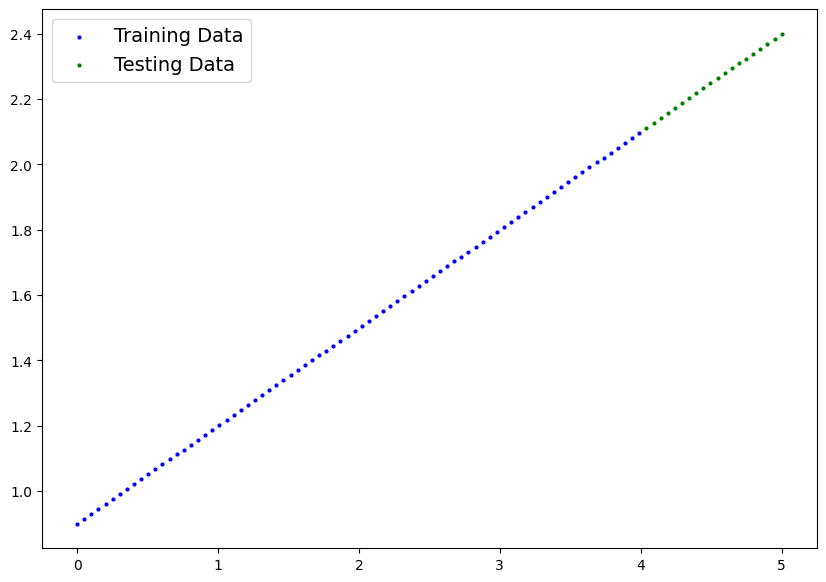

In [22]:
plot_predictions()

## Q2: Build a PyTorch model by subclassing `nn.Module`.

- Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for weights and one for bias.
- Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its `state_dict()`.
- **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.


In [23]:
# Create a Linear Regression model using pure Pytorch

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,  # Start with random weights from a normal distributions
                                    dtype=torch.float32, # pytorch loves float32 by default
                                    requires_grad=True
                                    ))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad=True))

        #Forward defines the computation in the model

    def forward(self, x):
        return self.weight * x + self.bias
        
    

In [33]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([-0.1429])), ('bias', tensor([-0.3765]))])

## Question 3:

In [34]:
## Loss function

loss_fn = nn.L1Loss()

## Optimizer

optimizer = torch.optim.SGD(params = model.parameters(), 
                        lr = 0.01)

loss_fn, optimizer



(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [35]:
# Training Loop

epochs  = 300
training_loss_list = []
test_loss_list = []
epoch_count = []

for epoch in range(epochs):

    # Training Mode
    model.train()

    # 1. Forward Pass
    y_preds = model.forward(X_train)

    # 2: compute the loss
    loss = loss_fn(y_train, y_preds)

    # 3. Clean the gradients of the optimzer
    optimizer.zero_grad()

    # 4. Propagate the loss backwards
    loss.backward()

    #5. Step
    optimizer.step()

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data

      test_pred = model(X_test)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            training_loss_list.append(loss.detach().numpy())
            test_loss_list.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 2.160029888153076 | MAE Test Loss: 3.1782023906707764 
Epoch: 20 | MAE Train Loss: 1.1640653610229492 | MAE Test Loss: 1.1746876239776611 
Epoch: 40 | MAE Train Loss: 0.37662482261657715 | MAE Test Loss: 0.4503123164176941 
Epoch: 60 | MAE Train Loss: 0.3389241397380829 | MAE Test Loss: 0.5133076310157776 
Epoch: 80 | MAE Train Loss: 0.3079215884208679 | MAE Test Loss: 0.4798695147037506 
Epoch: 100 | MAE Train Loss: 0.2769700288772583 | MAE Test Loss: 0.4297712445259094 
Epoch: 120 | MAE Train Loss: 0.2460242211818695 | MAE Test Loss: 0.38300538063049316 
Epoch: 140 | MAE Train Loss: 0.21507668495178223 | MAE Test Loss: 0.33290737867355347 
Epoch: 160 | MAE Train Loss: 0.1841268092393875 | MAE Test Loss: 0.2861413359642029 
Epoch: 180 | MAE Train Loss: 0.153183251619339 | MAE Test Loss: 0.23604364693164825 
Epoch: 200 | MAE Train Loss: 0.12222923338413239 | MAE Test Loss: 0.1892780065536499 
Epoch: 220 | MAE Train Loss: 0.09128639847040176 | MAE Test Loss: 0

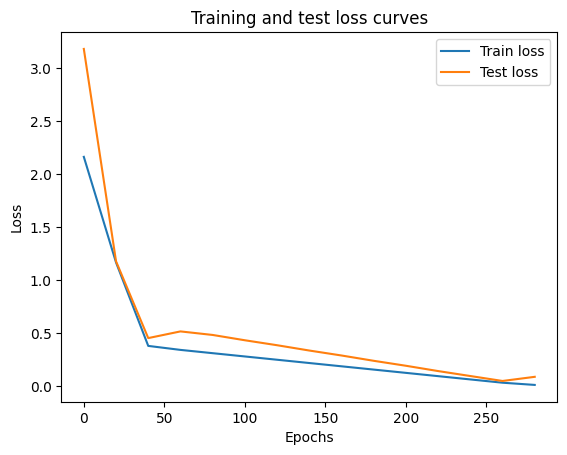

In [36]:
# Plot the loss curves
plt.plot(epoch_count, training_loss_list, label="Train loss")
plt.plot(epoch_count, test_loss_list, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [37]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.3018]), 'bias': tensor([0.8900])})

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [38]:
# 1. Set the model in evaluation mode
model.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  X_test = X_test.to(device)
  y_preds = model(X_test)
y_preds

tensor([[2.1092],
        [2.1244],
        [2.1397],
        [2.1549],
        [2.1702],
        [2.1854],
        [2.2006],
        [2.2159],
        [2.2311],
        [2.2464],
        [2.2616],
        [2.2768],
        [2.2921],
        [2.3073],
        [2.3226],
        [2.3378],
        [2.3530],
        [2.3683],
        [2.3835],
        [2.3988]])

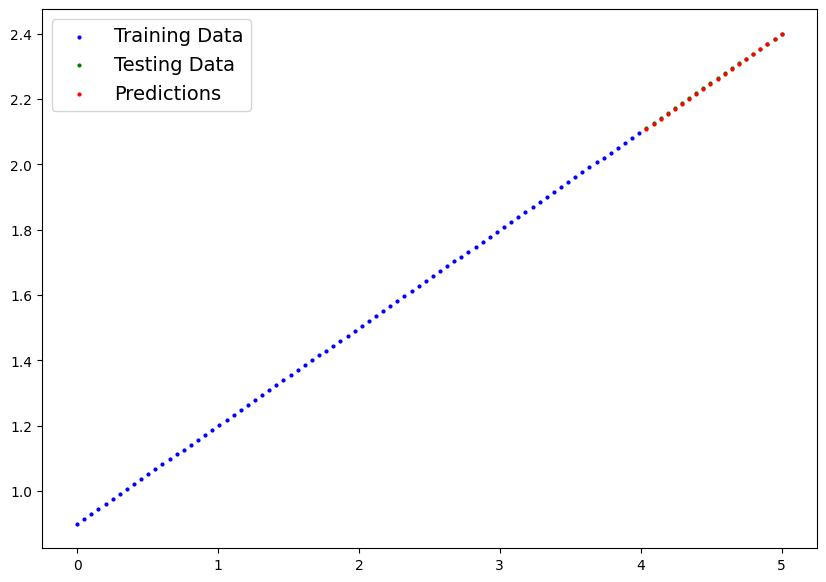

In [39]:
plot_predictions(predictions = y_preds)